In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df = df.replace(' ', np.nan)

In [5]:
df.duplicated().any()

False

In [6]:
print("Null Values:")
df.isna().sum()

Null Values:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in TotalCharges, so let's just drop them. Also, remove the customerID column as it's not useful for analysis.

In [7]:
# drop null
df2 = df.dropna(subset=['TotalCharges'])

# drop customerID
df2 = df2.drop(columns=['customerID'], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [8]:
for col in df2.columns:
    print(f"{col}: {df2[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

convert SeniorCitizen to categorical type, convert TotalCharges to float type, and inspect all the columns with object type.

In [9]:
# convert SeniorCitizen's values to Yes & No
df2['SeniorCitizen'] = df2['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df2['SeniorCitizen'] = df2['SeniorCitizen'].astype('object')

# convert TotalCharges to float
df2['TotalCharges'] = df2['TotalCharges'].astype('float64')

for col in df2.select_dtypes(include=['object']).columns:
    print(f"{col}: {df2[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: ['No' 'Yes']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


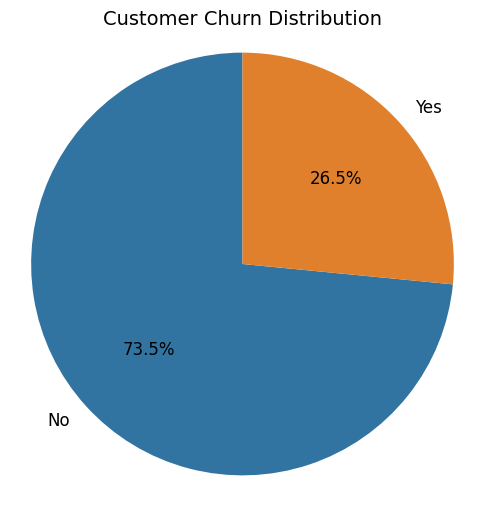

In [10]:
# Count churn values
churn_counts = df['Churn'].value_counts()

# Labels and sizes
labels = churn_counts.index
sizes = churn_counts.values
colors = ['#3274a1', '#e0802c']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Customer Churn Distribution', fontsize=14)
plt.axis('equal')

plt.show()

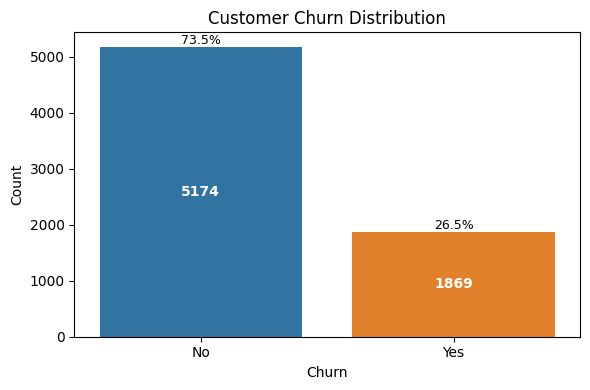

In [11]:
# Count the total number of rows
total = len(df)

# Create the countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

# Add both count (inside) and percentage (above)
for bar in ax.patches:
    count = bar.get_height()
    bar_center = bar.get_x() + bar.get_width() / 2

    # Add count inside the bar (middle)
    ax.text(
        bar_center,
        count * 0.5,  # middle of the bar
        f'{int(count)}',
        ha='center',
        va='center',
        fontsize=10,
        color='white',
        fontweight='bold'
    )

    # Add percentage above the bar
    ax.text(
        bar_center,
        count + 2,  # slightly above
        f'{(count / total) * 100:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

Let's plot the distribution of each categorical column by Churn

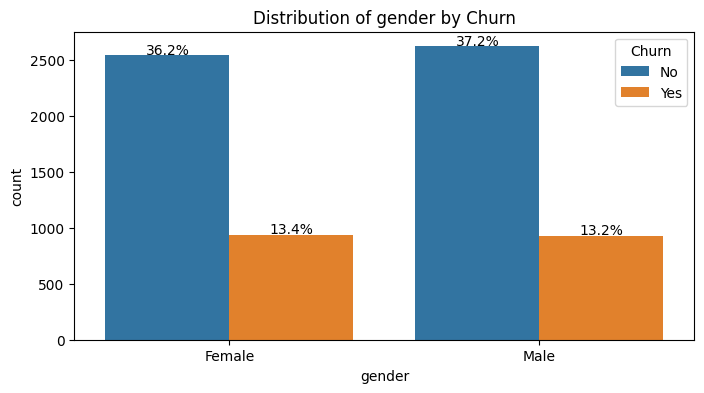

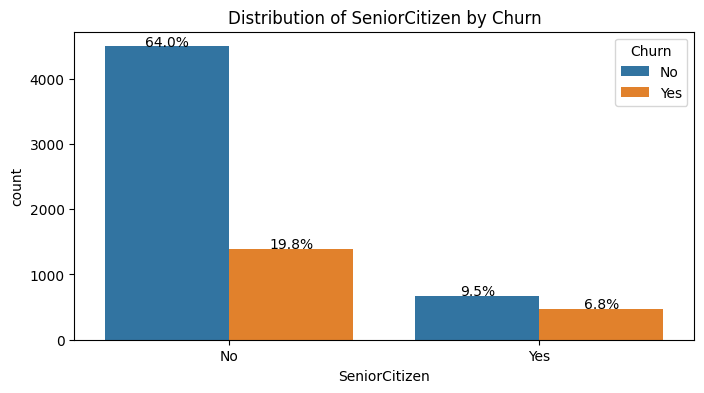

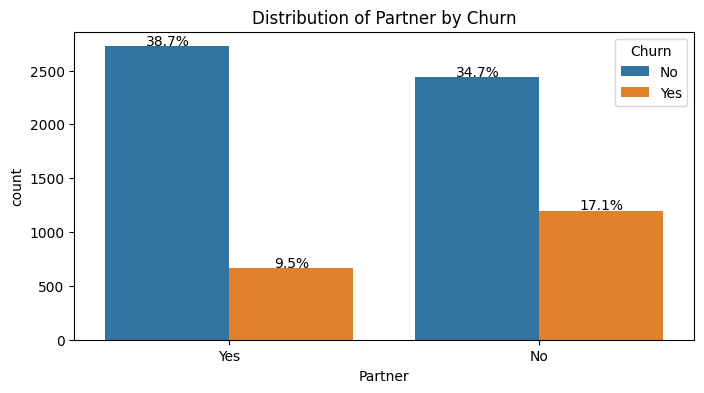

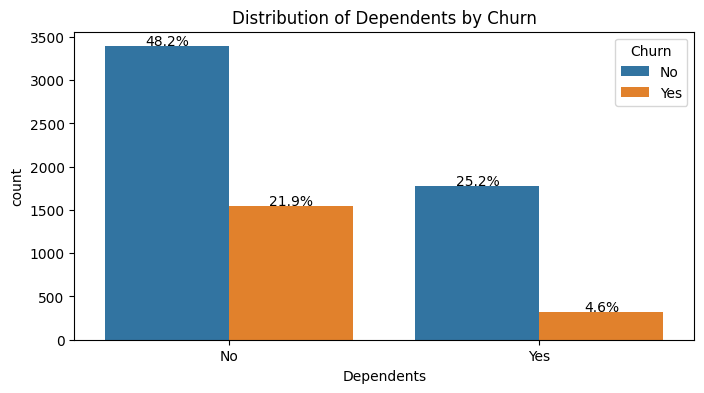

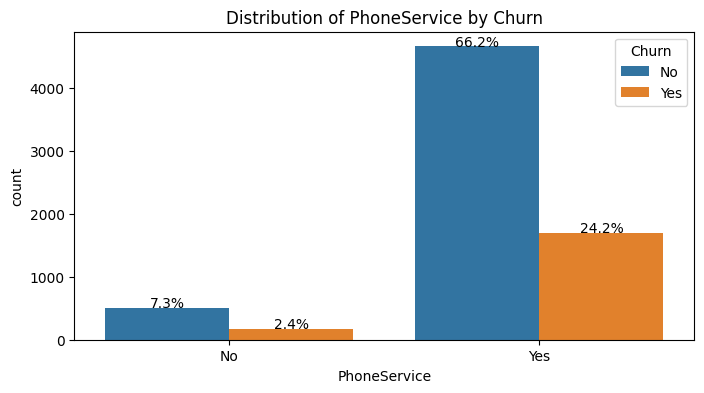

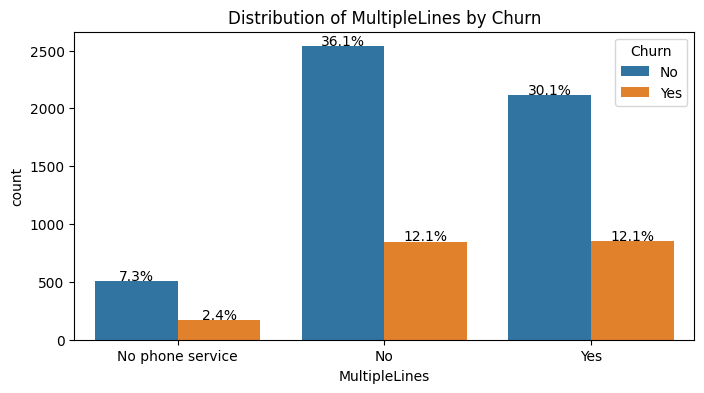

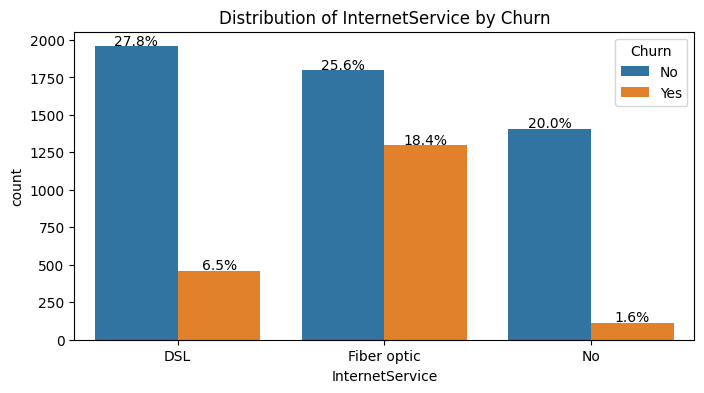

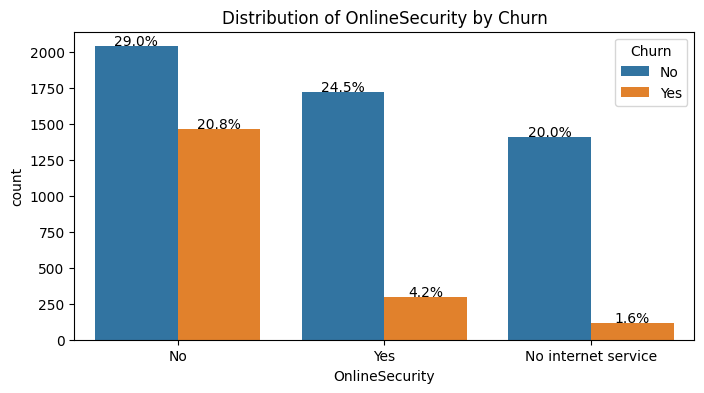

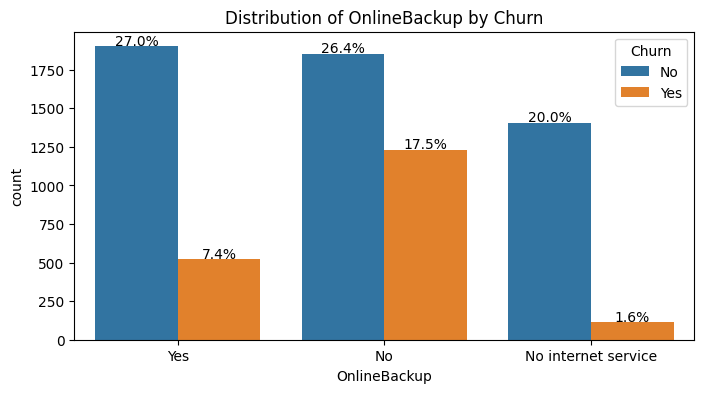

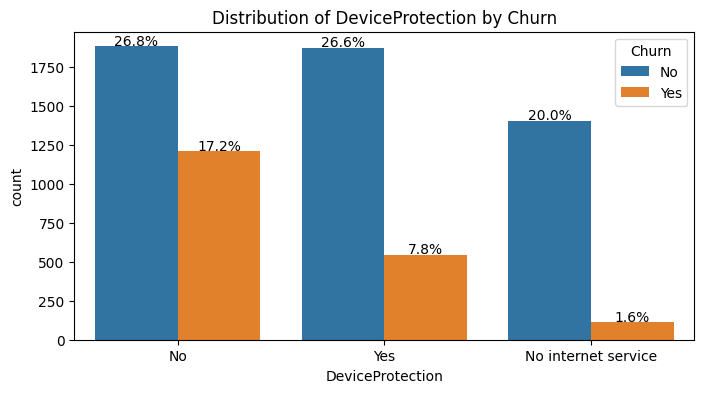

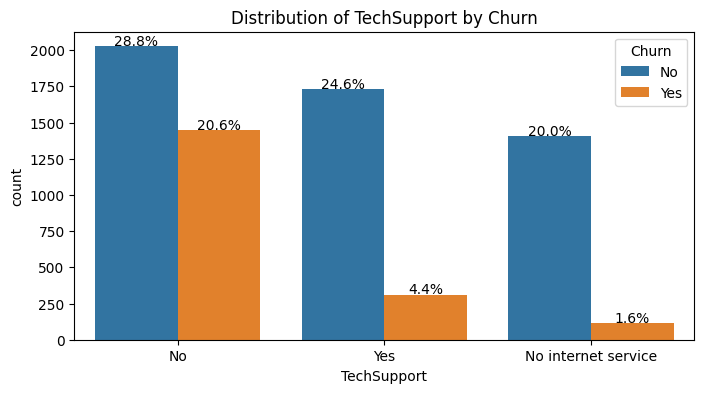

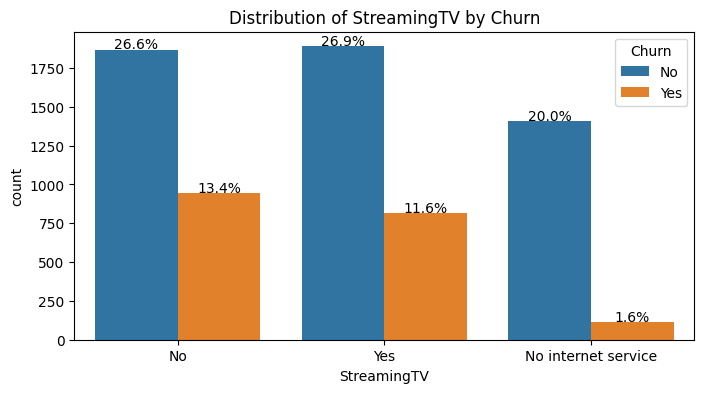

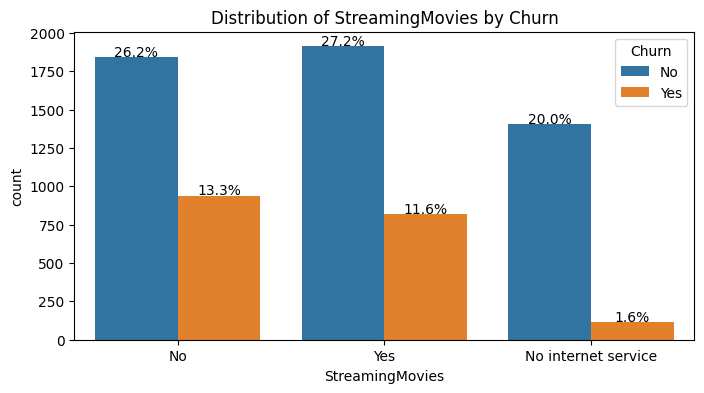

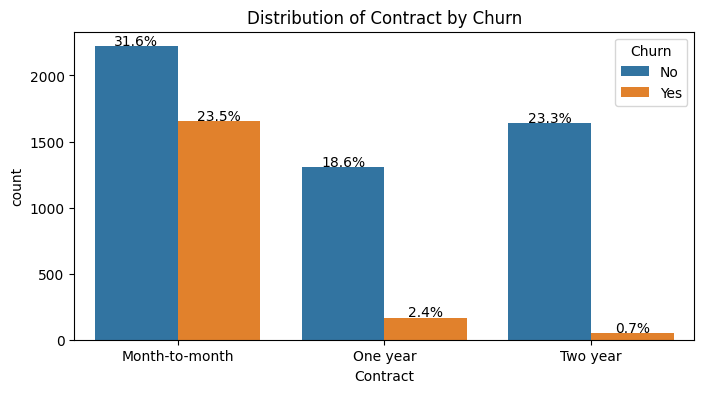

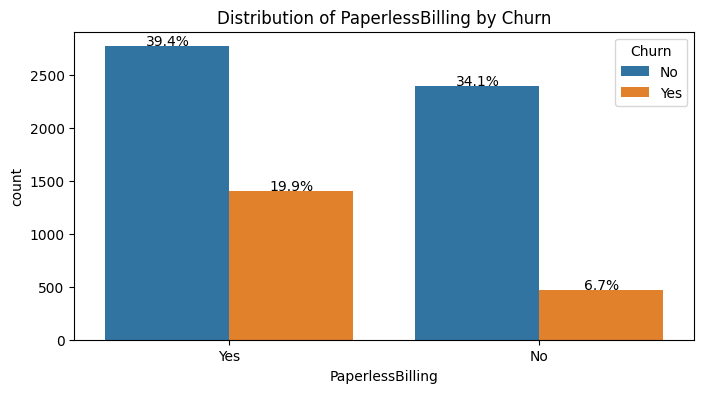

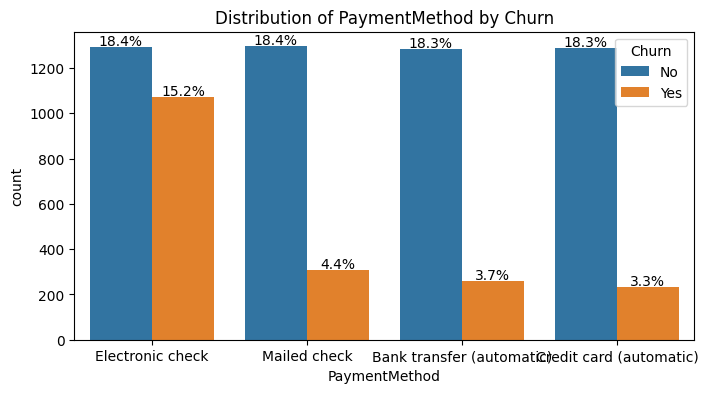

In [12]:
for col in df2.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Churn', data=df2)
        plt.title(f"Distribution of {col} by Churn")
        # add bar label to the plot
        ax = plt.gca()
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 7,
                   '{:.1f}%'.format((height / len(df2)) * 100),
                   ha='center')
        plt.show()

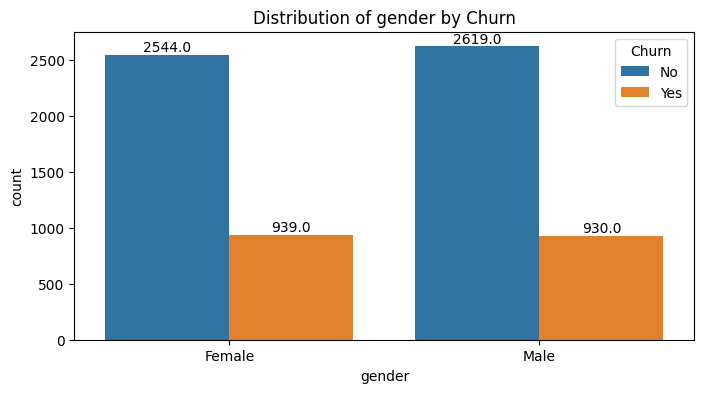

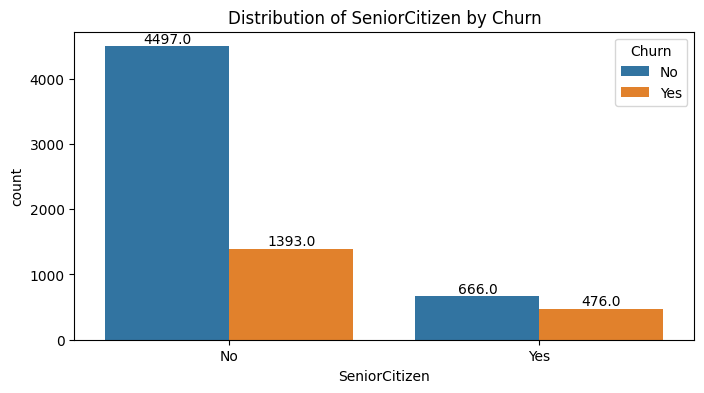

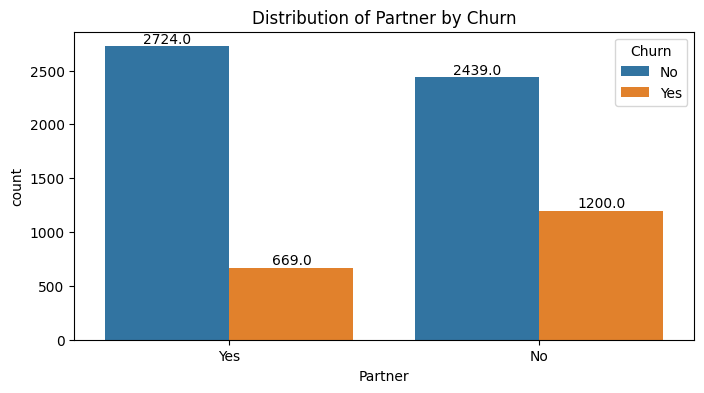

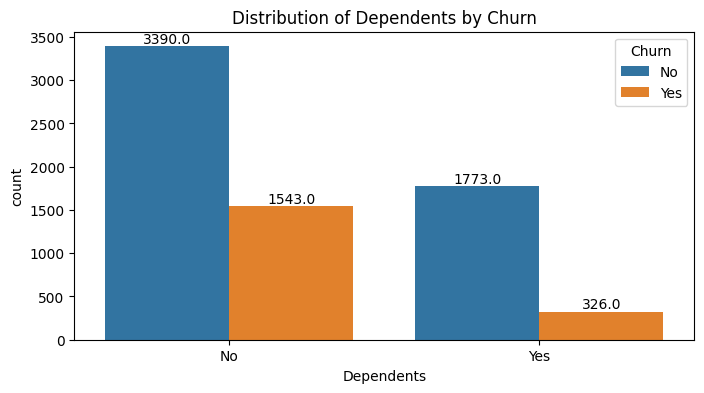

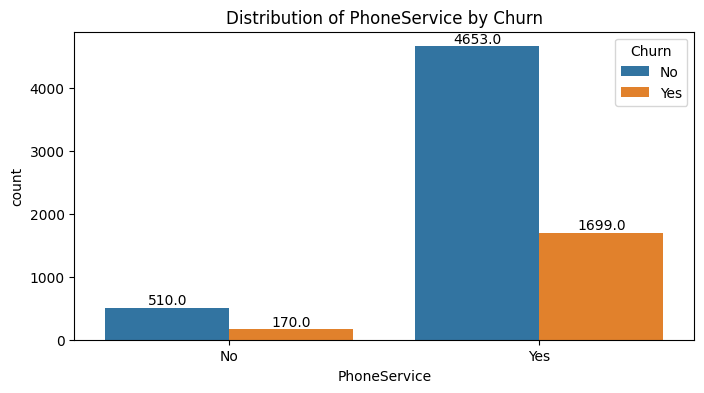

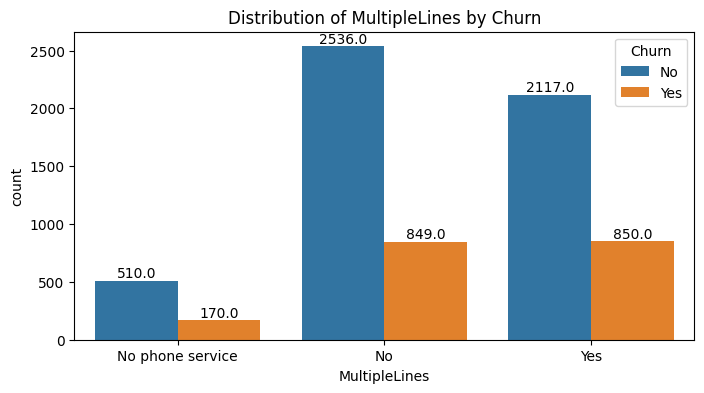

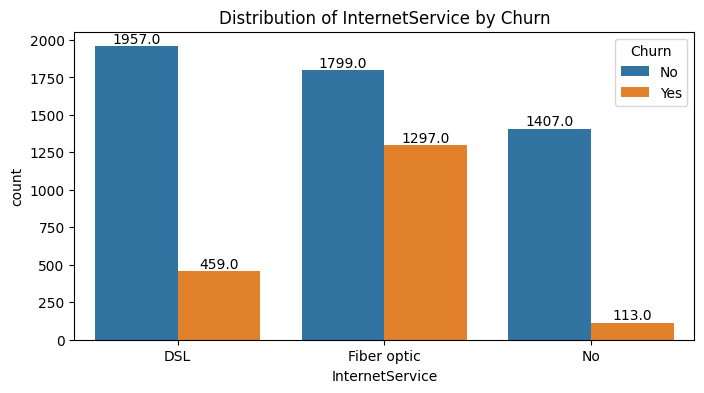

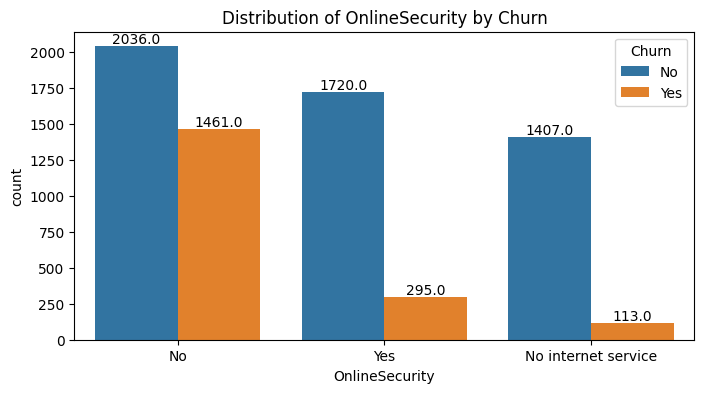

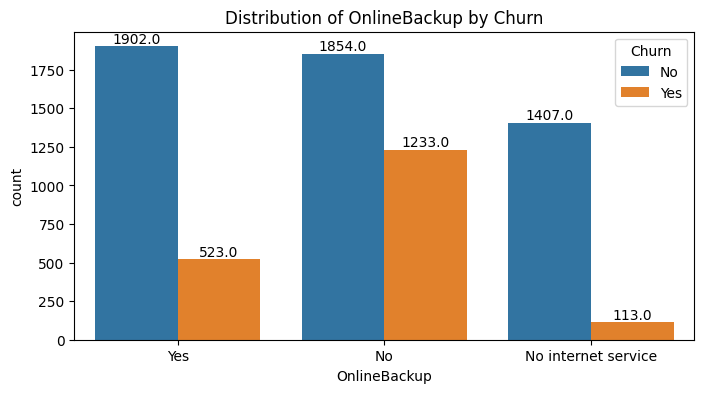

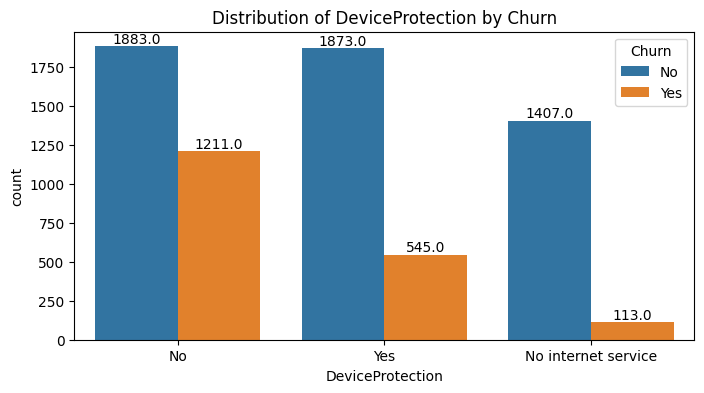

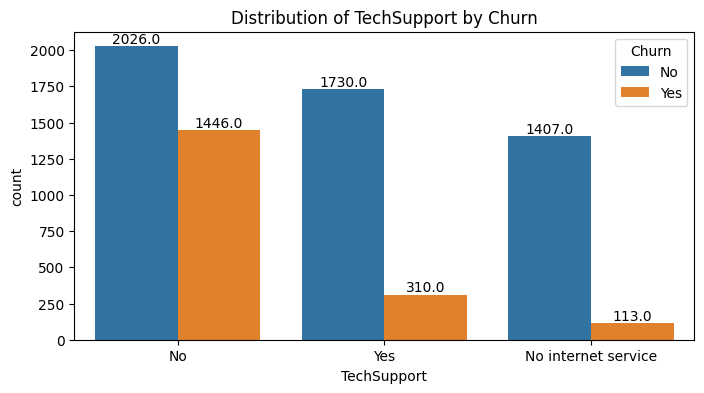

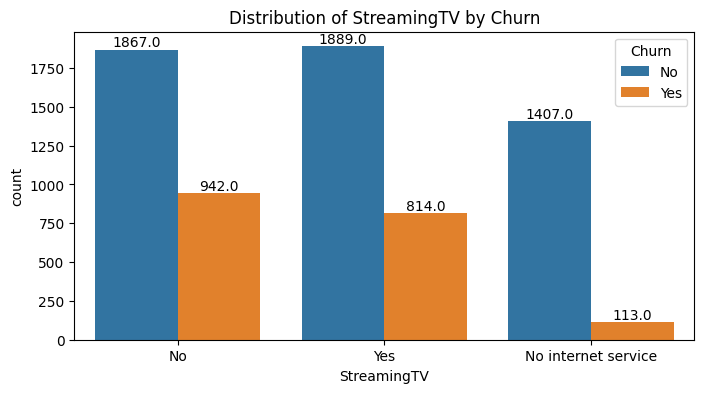

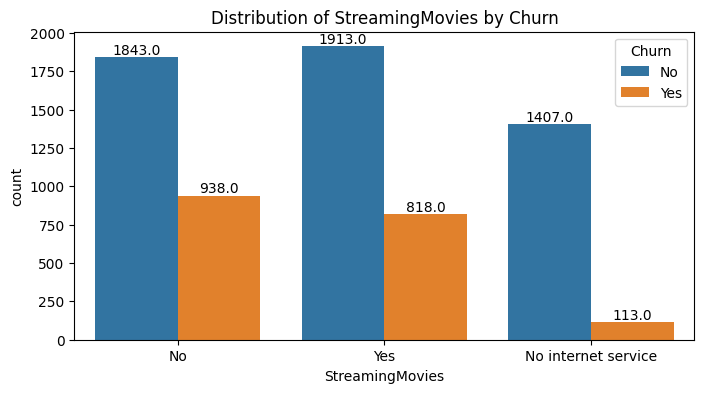

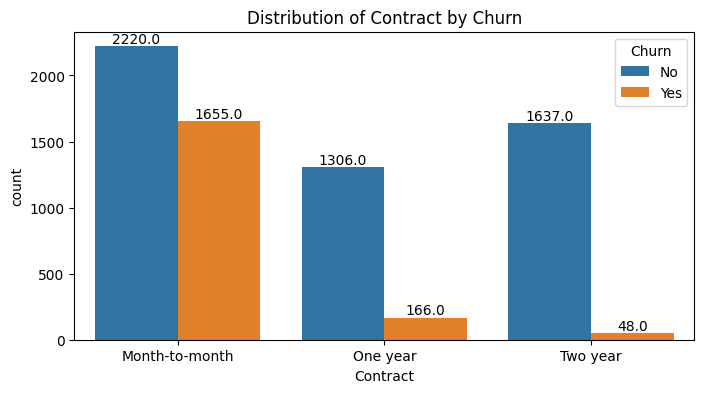

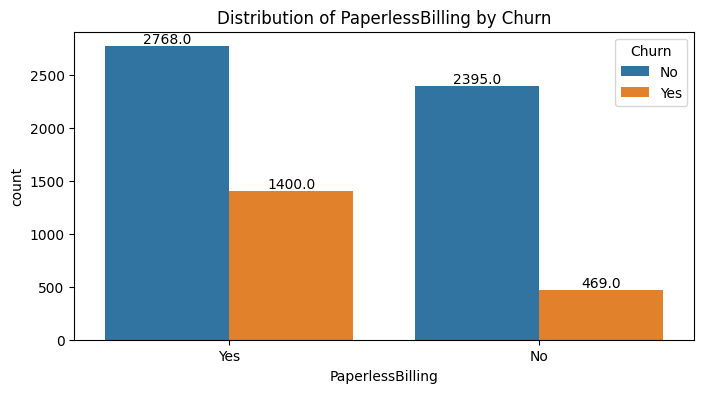

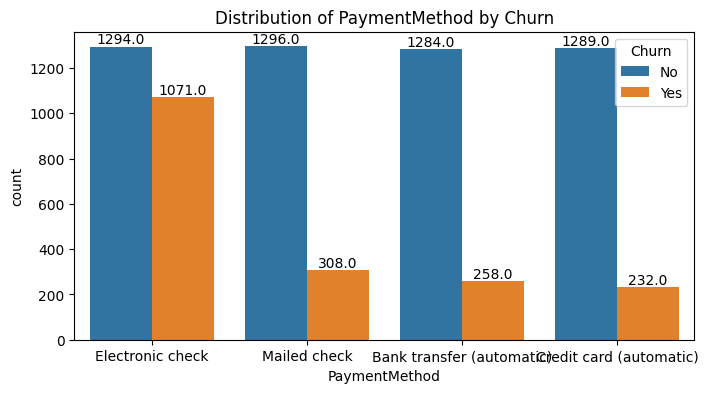

In [13]:
for col in df2.select_dtypes(include=['object']).columns:
  if col != 'Churn':
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Churn', data=df2)
    plt.title(f'Distribution of {col} by Churn')

    # Add data values to the plot
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                height, ha='center', va='bottom')

    plt.show()

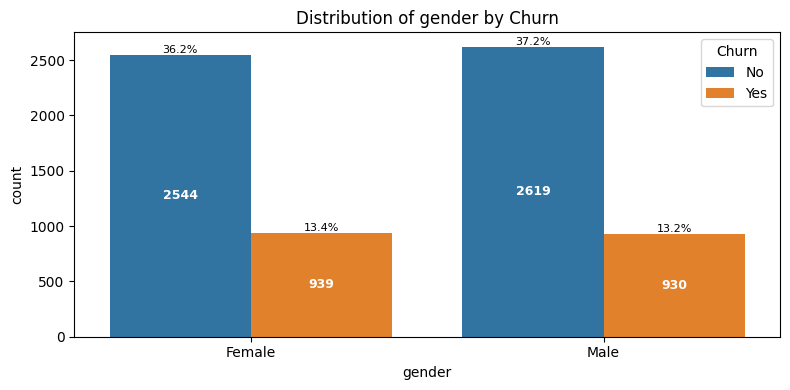

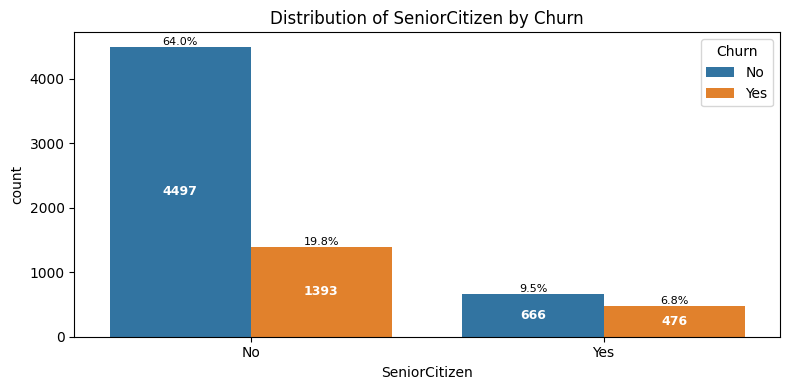

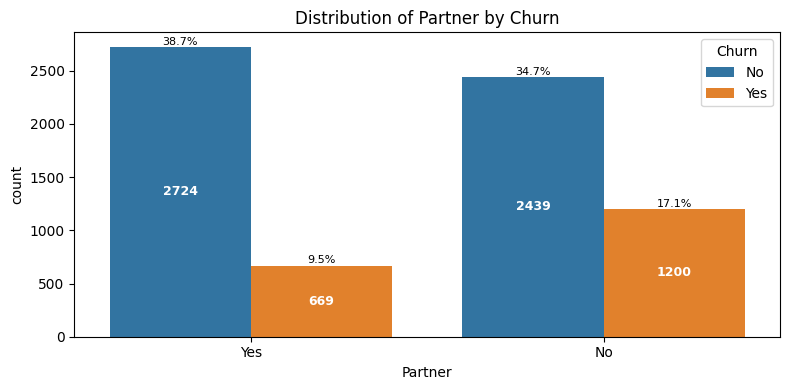

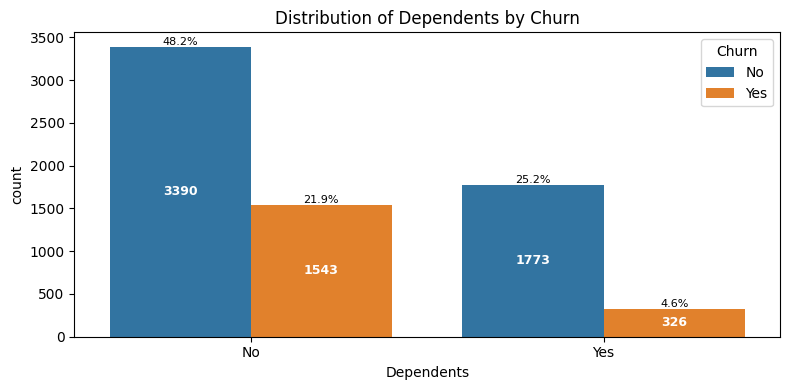

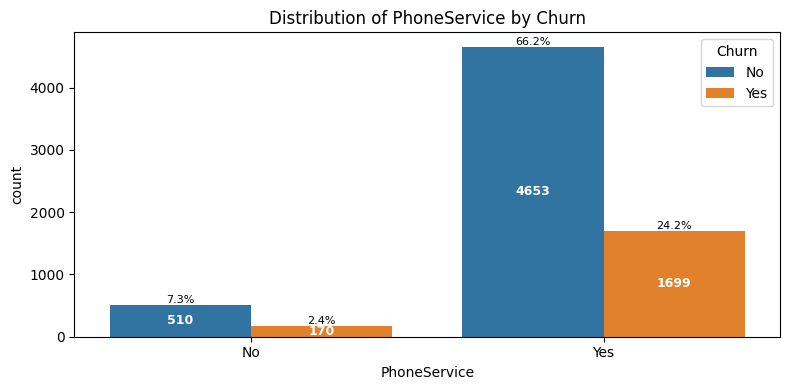

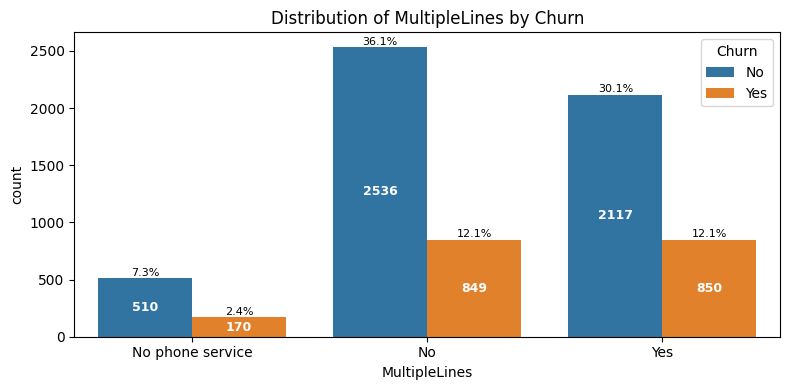

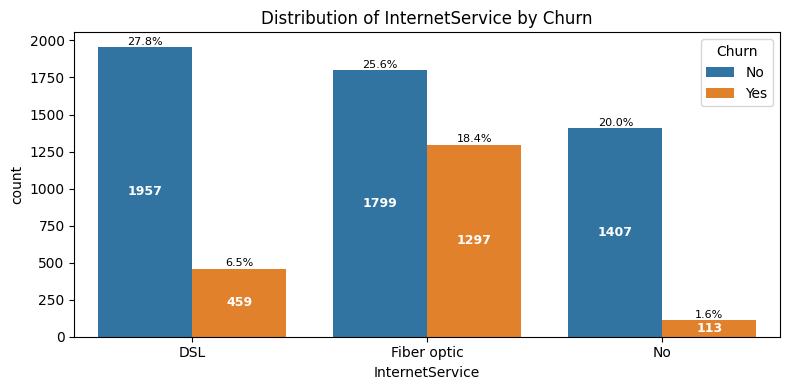

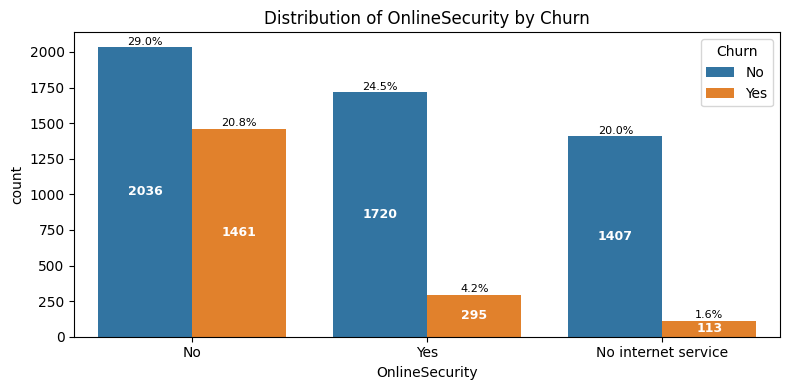

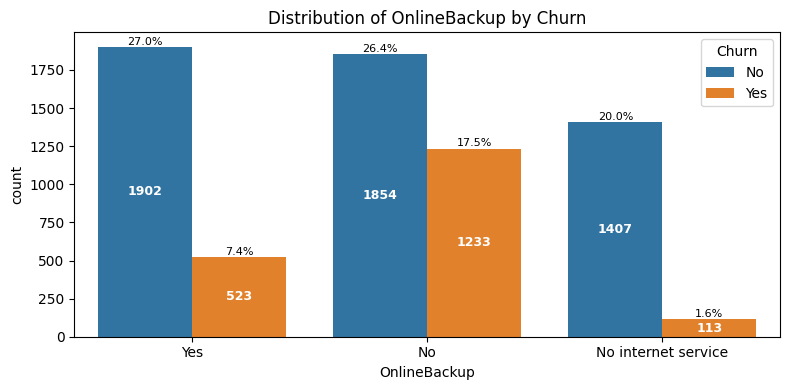

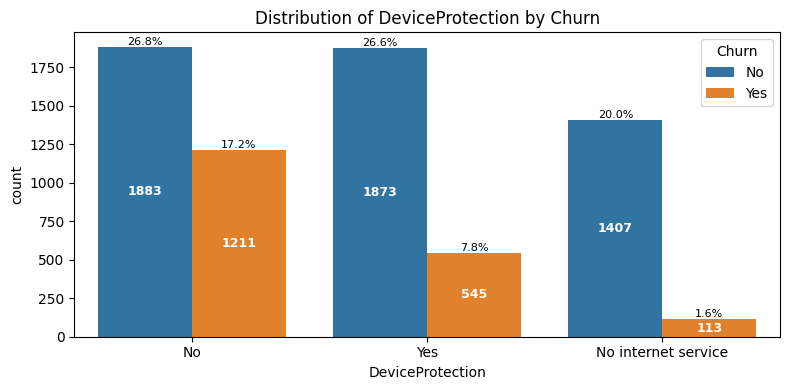

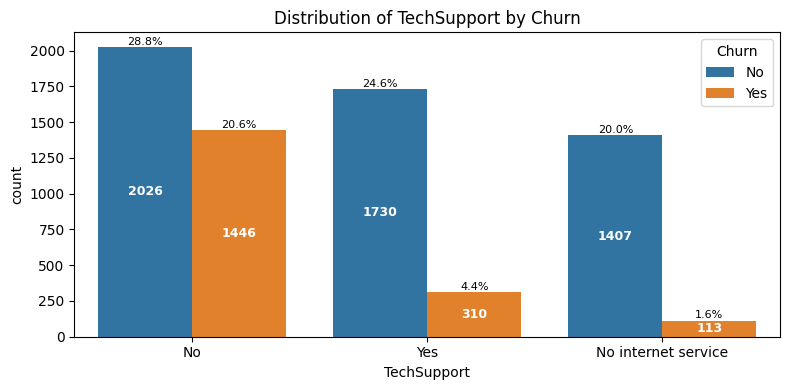

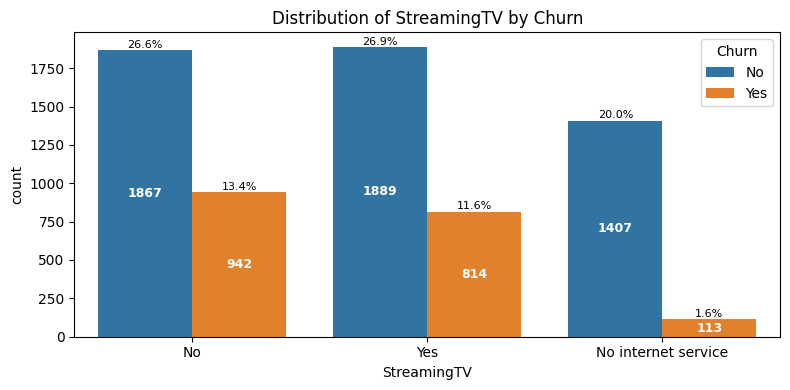

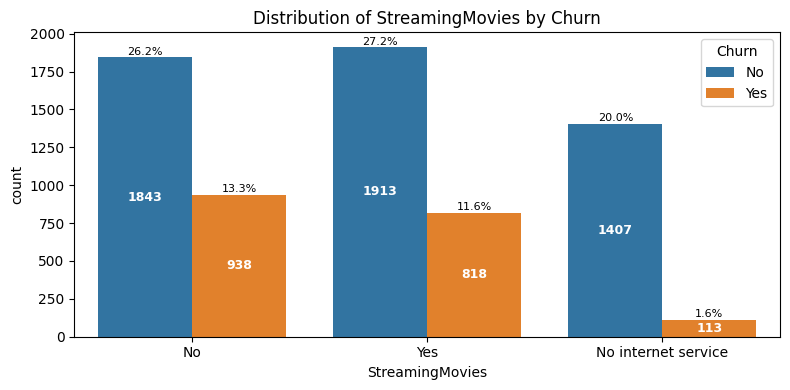

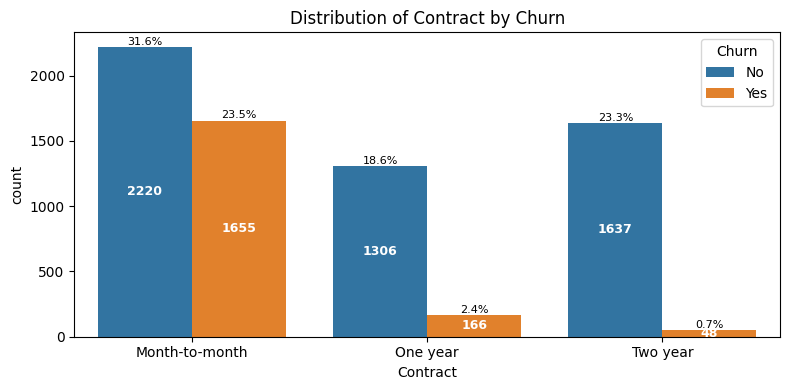

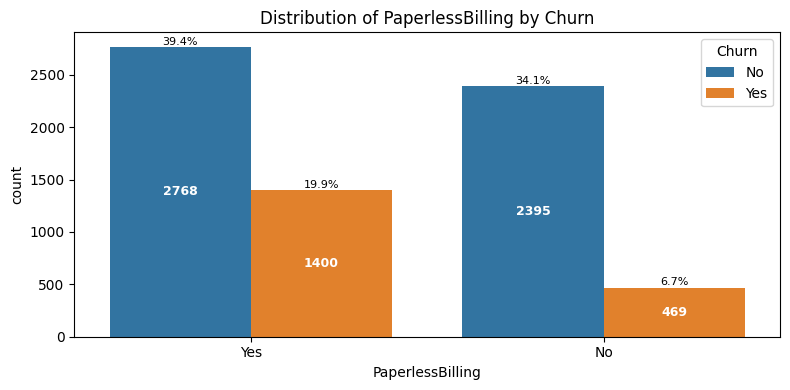

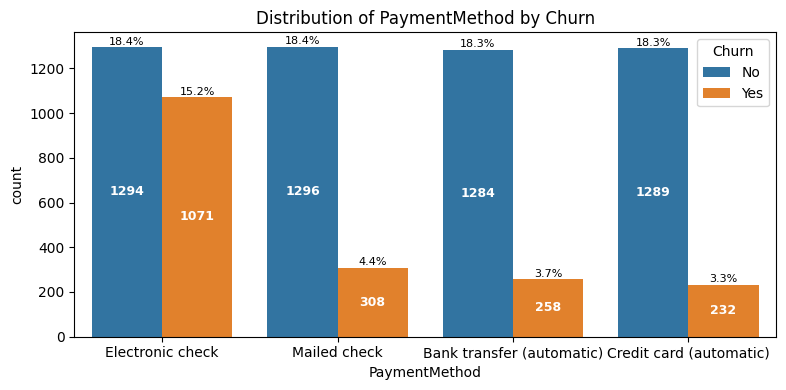

In [14]:
for col in df2.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Churn', data=df2)
        plt.title(f'Distribution of {col} by Churn')

        # Get the axis
        ax = plt.gca()
        
        for p in ax.patches:
            height = p.get_height()
            bar_center = p.get_x() + p.get_width() / 2

            # Count inside the bar
            if height > 0:
                ax.text(bar_center, height * 0.5,  # middle of the bar
                        f'{int(height)}',
                        ha='center', va='center',
                        fontsize=9, color='white', fontweight='bold')

                # Percentage on top of the bar
                ax.text(bar_center, height + 2,
                        f'{(height / len(df2)) * 100:.1f}%',
                        ha='center', va='bottom',
                        fontsize=8, color='black')

        plt.tight_layout()
        plt.show()

There are some variables that have an uneven distribution which is thought to have a correlation with Churn. These variables are: 

Partner, Contract, SeniorCitizen, InternetService, OnlineBackup

In [15]:
df2.describe(include=np.number)

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


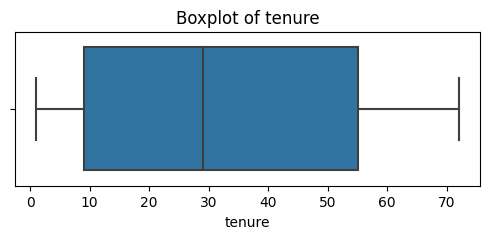

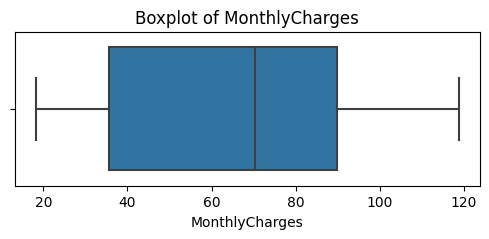

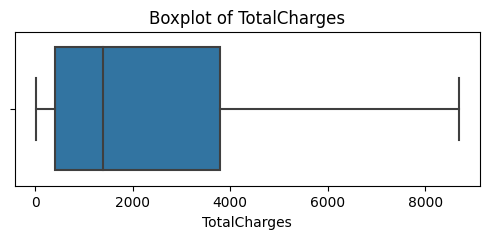

In [16]:
# Check for outliers using boxplots
for col in df2.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(6, 2))
  sns.boxplot(x=df2[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

There is no outlier data in the numerical columns

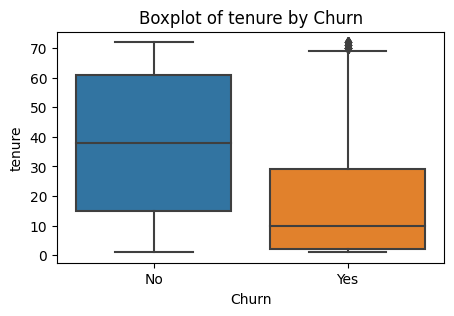

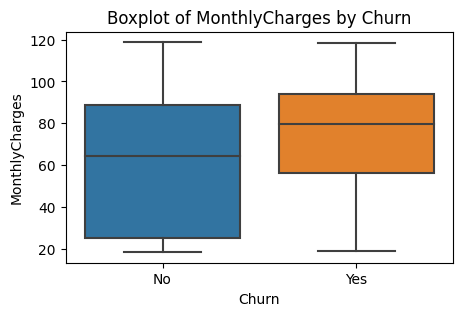

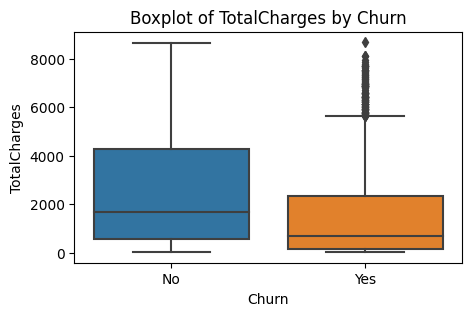

In [17]:
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in columns_to_plot:
  plt.figure(figsize=(5, 3))
  sns.boxplot(x='Churn', y=col, data=df2)
  plt.title(f'Boxplot of {col} by Churn')
  plt.show()

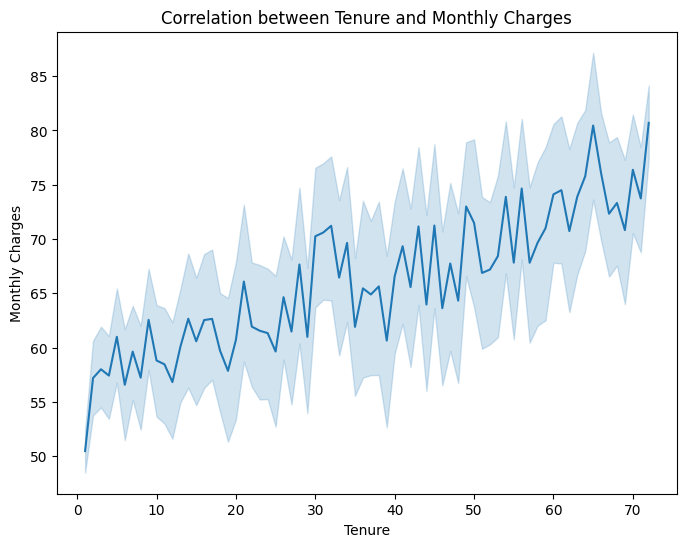

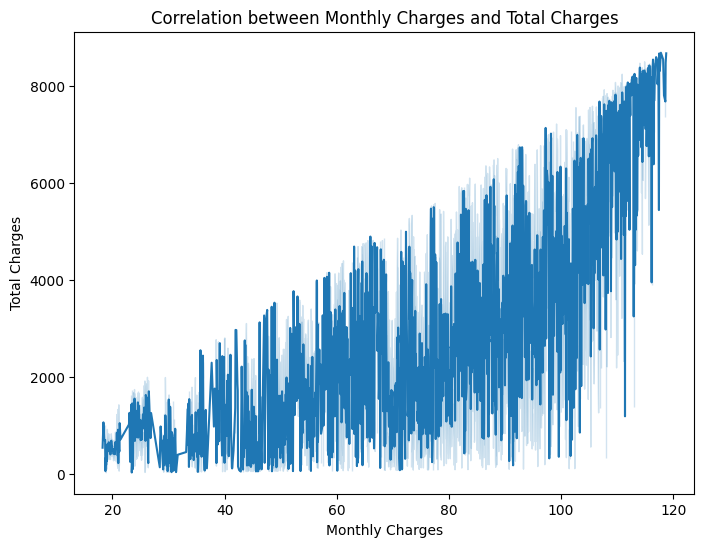

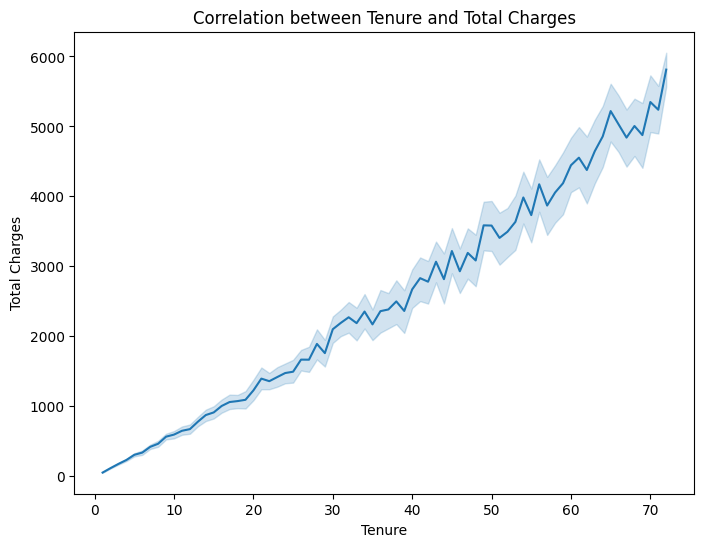

In [18]:
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Line plot for tenure vs MonthlyCharges
plt.figure(figsize=(8, 6))
sns.lineplot(x='tenure', y='MonthlyCharges', data=df2)
plt.title('Correlation between Tenure and Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# Line plot for MonthlyCharges vs TotalCharges
plt.figure(figsize=(8, 6))
sns.lineplot(x='MonthlyCharges', y='TotalCharges', data=df2)
plt.title('Correlation between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

# Line plot for tenure vs TotalCharges
plt.figure(figsize=(8, 6))
sns.lineplot(x='tenure', y='TotalCharges', data=df2)
plt.title('Correlation between Tenure and Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

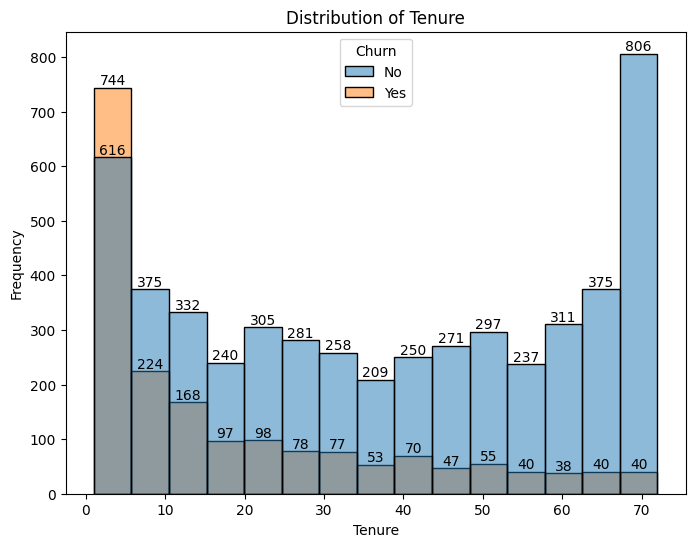

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(x="tenure",hue="Churn",data=df2)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Add data values to the plot
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            height, ha='center', va='bottom')

plt.show()

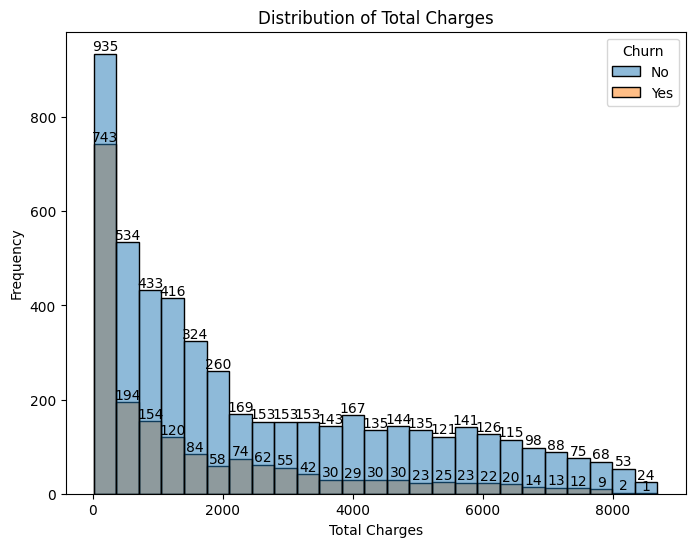

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(x = "TotalCharges",hue= "Churn",data=df2)
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')

# Add data values to the plot
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            height, ha='center', va='bottom')

plt.show()

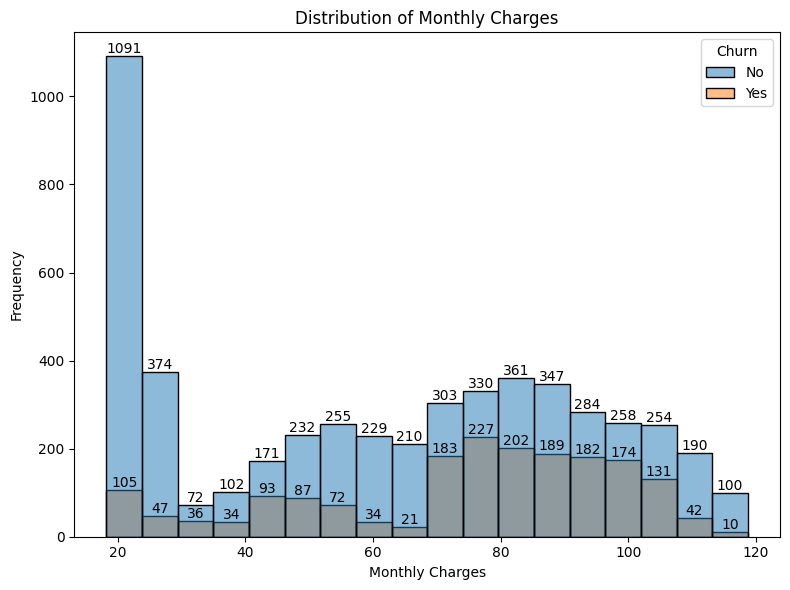

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(x="MonthlyCharges", hue="Churn", data=df2)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')

# Add data values to the plot
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid printing zeros or empty bars
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Correlation Analysis

In [22]:
# Dataset 1: Churn and Categorical Data
df_churn_cat = df2.select_dtypes(include=['object'])
df_churn_cat['Churn'] = df2['Churn']

# Dataset 2: Churn and Numerical Data
df_churn_num = df2.select_dtypes(include=['number'])
df_churn_num['Churn'] = df2['Churn']

print("Dataset 1 (Churn and Categorical):")
print(df_churn_cat.head())
print("\nDataset 2 (Churn and Numerical):")
print(df_churn_num.head())

Dataset 1 (Churn and Categorical):
   gender SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female            No     Yes         No           No  No phone service   
1    Male            No      No         No          Yes                No   
2    Male            No      No         No          Yes                No   
3    Male            No      No         No           No  No phone service   
4  Female            No      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies    

## Numerical vs Churn

In [23]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Churn' column
df_churn_num['Churn'] = df_churn_num['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

df_churn_num[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


as expected, higher monthly charge higher total charges.

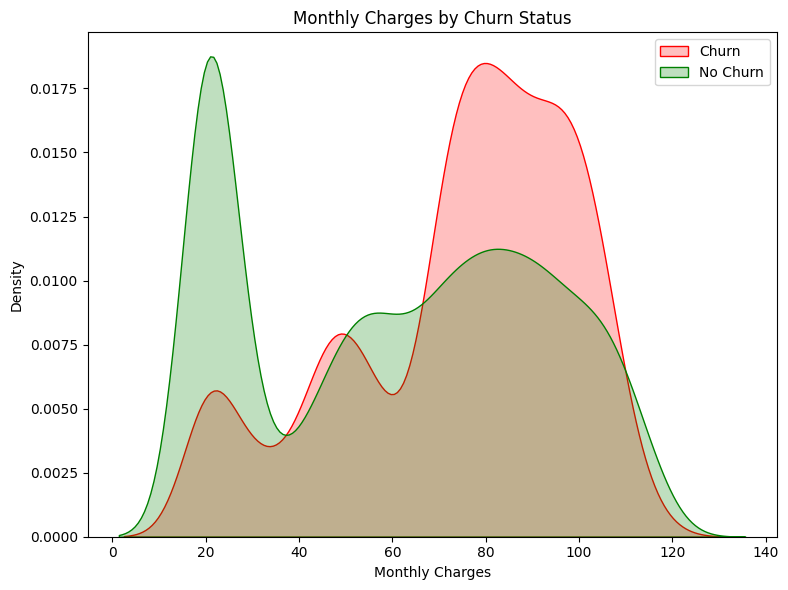

In [24]:
# density plot by churn - Monthly Charges
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df_churn_num[df_churn_num["Churn"] == 1],
    x="MonthlyCharges", fill=True, color="red", label="Churn"
)

sns.kdeplot(
    data=df_churn_num[df_churn_num["Churn"] == 0],
    x="MonthlyCharges", fill=True, color="green", label="No Churn"
)

plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Monthly Charges by Churn Status")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


increasing monthly charges, tend to increase churn probability

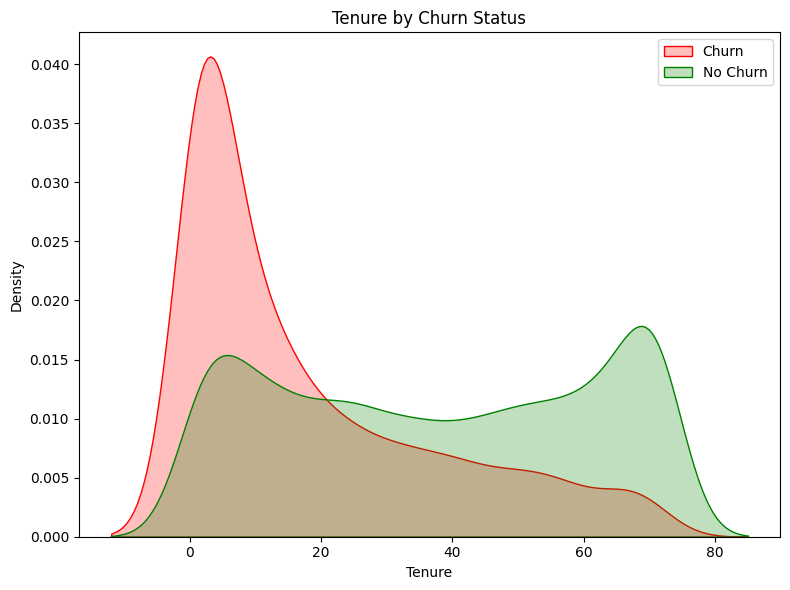

In [25]:
# density plot by churn - Tenure
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df_churn_num[df_churn_num["Churn"] == 1],
    x="tenure", fill=True, color="red", label="Churn"
)

sns.kdeplot(
    data=df_churn_num[df_churn_num["Churn"] == 0],
    x="tenure", fill=True, color="green", label="No Churn"
)

plt.xlabel("Tenure")
plt.ylabel("Density")
plt.title("Tenure by Churn Status")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

increasing tenure, tend to decrease churn probability

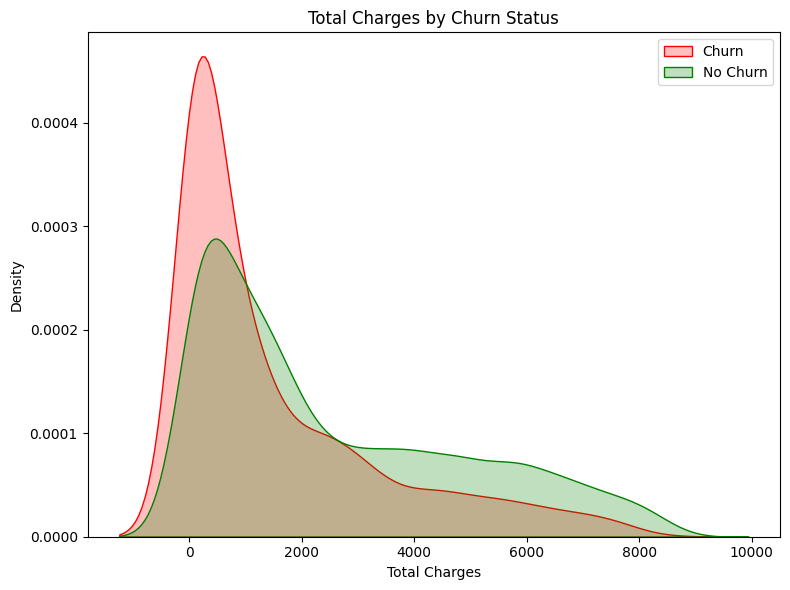

In [26]:
# density plot by churn - Total Charges
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df_churn_num[df_churn_num["Churn"] == 1],
    x="TotalCharges", fill=True, color="red", label="Churn"
)

sns.kdeplot(
    data=df_churn_num[df_churn_num["Churn"] == 0],
    x="TotalCharges", fill=True, color="green", label="No Churn"
)

plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.title("Total Charges by Churn Status")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

increasing total charges, tend to decrease churn probability

Key Insight: Higher Monthly Charge, Lower Tenure and Lower Total Charge are probability to High Churn.

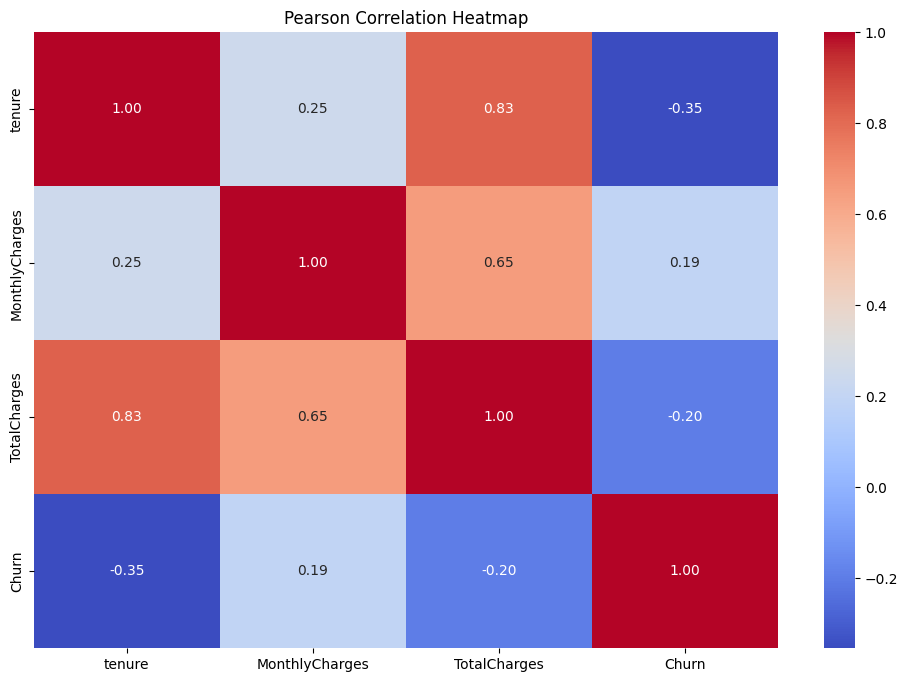

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_churn_num.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

In [28]:
# Calculate the correlation between each numerical column and 'Churn'
correlation_with_churn = df_churn_num.corr()['Churn'].sort_values(ascending=False)

# Print the correlation values
print(correlation_with_churn)

Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


In [29]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on Churn
churn_yes = df_churn_num[df_churn_num['Churn'] == 1]
churn_no = df_churn_num[df_churn_num['Churn'] == 0]

# Perform t-tests for each numerical feature
for column in df_churn_num.columns:
  if column != 'Churn':
    t_statistic, p_value = ttest_ind(churn_yes[column], churn_no[column])
    print(f"T-test for {column}:")
    print(f"  T-statistic: {t_statistic:.2f}")
    print(f"  P-value: {p_value:.3f}")

    # Interpret the results
    if p_value < 0.05:
      print("  There is a statistically significant difference between churned and non-churned customers for this feature.")
    else:
      print("  There is no statistically significant difference between churned and non-churned customers for this feature.")
    print("---")

T-test for tenure:
  T-statistic: -31.74
  P-value: 0.000
  There is a statistically significant difference between churned and non-churned customers for this feature.
---
T-test for MonthlyCharges:
  T-statistic: 16.48
  P-value: 0.000
  There is a statistically significant difference between churned and non-churned customers for this feature.
---
T-test for TotalCharges:
  T-statistic: -17.07
  P-value: 0.000
  There is a statistically significant difference between churned and non-churned customers for this feature.
---


In [30]:
import statsmodels.api as sm

# Define independent variables (use columns from your dataset)
X = df_churn_num[['MonthlyCharges', 'tenure', 'TotalCharges']]
y = df_churn_num['Churn']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary which includes p-values for significance testing
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.453372
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7028
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                  0.2170
Time:                        12:47:28   Log-Likelihood:                -3188.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5988      0.117    -13.628      0.000      -1.829      -1.369
MonthlyCharges   

## Categorical vs Churn

In [31]:
# df_churn_cat = df_churn_cat[['SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','Churn']]
df_churn_cat = df_churn_cat[['InternetService','Partner','Contract','OnlineBackup','Churn']]
df_churn_cat.head()

,InternetService,Partner,Contract,OnlineBackup,Churn
0,DSL,Yes,Month-to-month,Yes,No
1,DSL,No,One year,No,No
2,DSL,No,Month-to-month,Yes,Yes
3,DSL,No,One year,No,No
4,Fiber optic,No,Month-to-month,No,Yes


In [32]:
for column in df_churn_cat.columns:
  # Print the column name and its unique values
  print(f"Column: {column}")
  print(df_churn_cat[column].unique())
  print("-" * 20)

Column: InternetService
['DSL' 'Fiber optic' 'No']
--------------------
Column: Partner
['Yes' 'No']
--------------------
Column: Contract
['Month-to-month' 'One year' 'Two year']
--------------------
Column: OnlineBackup
['Yes' 'No' 'No internet service']
--------------------
Column: Churn
['No' 'Yes']
--------------------


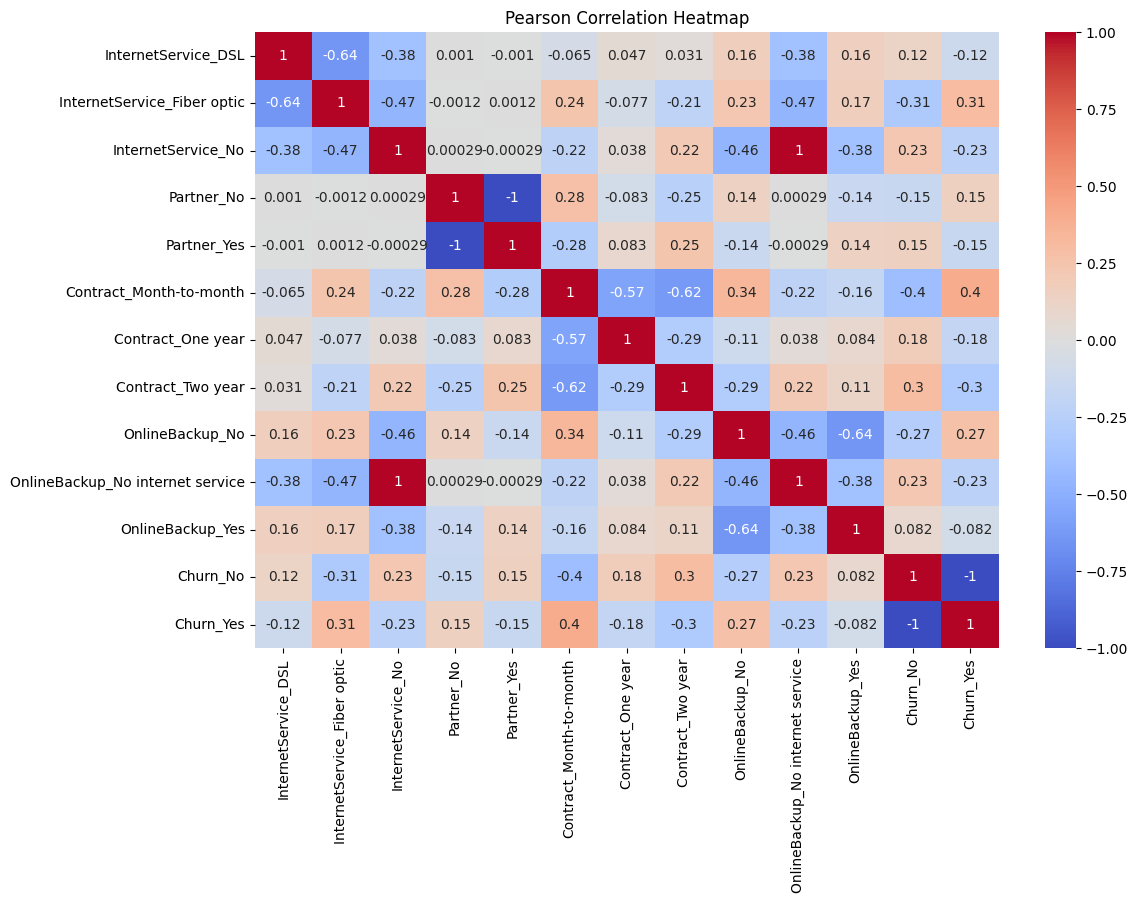

In [33]:
# Convert categorical features to numerical using one-hot encoding
df_churn_encoded = pd.get_dummies(df_churn_cat, drop_first=False)

# Calculate correlation matrix
correlation_matrix = df_churn_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df_churn_encoded.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [34]:
# Convert categorical features to numerical using one-hot encoding,
# but exclude the 'Churn' column
df_churn_encoded = pd.get_dummies(df_churn_cat.drop(columns=['Churn']), drop_first=False)

# Add the original 'Churn' column back to the encoded DataFrame
df_churn_encoded['Churn'] = df_churn_cat['Churn']

# Convert 'Churn' column to numerical (assuming 'Yes'=1, 'No'=0)
df_churn_encoded['Churn'] = df_churn_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Calculate correlation matrix
correlation_matrix = df_churn_encoded.corr()

# Perform chi-square test for each categorical feature against Churn
from scipy.stats import chi2_contingency

for column in df_churn_encoded.columns:
  if column != 'Churn':
    contingency_table = pd.crosstab(df_churn_encoded[column], df_churn_encoded['Churn'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {column}:")
    print(f"  Chi-square statistic: {chi2:.2f}")
    print(f"  P-value: {p_value:.3f}")

    # Interpret the results
    if p_value < 0.05:
      print("  There is a statistically significant association between this feature and churn.")
    else:
      print("  There is no statistically significant association between this feature and churn.")
    print("---")

Chi-square test for InternetService_DSL:
  Chi-square statistic: 107.78
  P-value: 0.000
  There is a statistically significant association between this feature and churn.
---
Chi-square test for InternetService_Fiber optic:
  Chi-square statistic: 663.36
  P-value: 0.000
  There is a statistically significant association between this feature and churn.
---
Chi-square test for InternetService_No:
  Chi-square statistic: 362.95
  P-value: 0.000
  There is a statistically significant association between this feature and churn.
---
Chi-square test for Partner_No:
  Chi-square statistic: 157.50
  P-value: 0.000
  There is a statistically significant association between this feature and churn.
---
Chi-square test for Partner_Yes:
  Chi-square statistic: 157.50
  P-value: 0.000
  There is a statistically significant association between this feature and churn.
---
Chi-square test for Contract_Month-to-month:
  Chi-square statistic: 1149.10
  P-value: 0.000
  There is a statistically significa